In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from sklearn.linear_model import LogisticRegression

In [2]:
vaxfile = "../public/data/vaccinations/vaccinations.json"

In [3]:
vaxframe = pd.read_json(vaxfile)

18992.0
18628.0


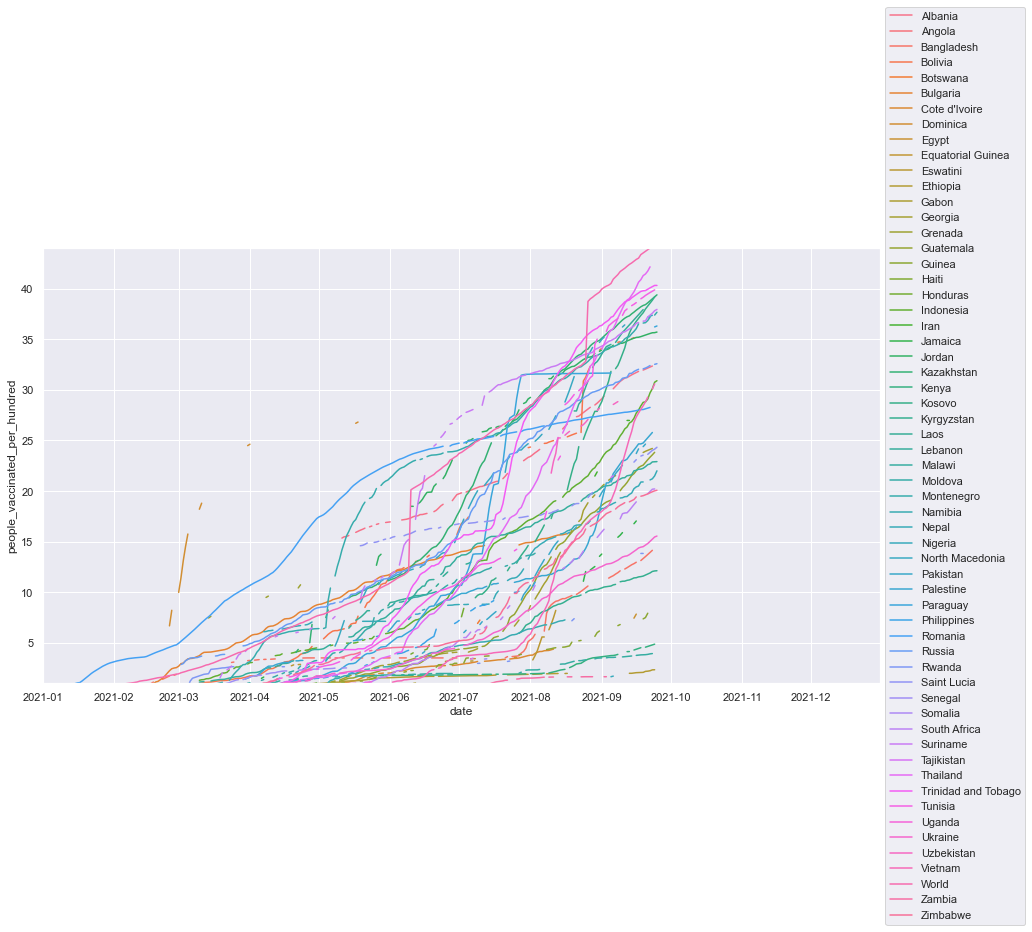

In [24]:
rows = []
regions = ['Africa','Asia','Europe','European Union','Low income','High income','Oceania','Lower middle income','North America','South America','Upper middle income']
startdate = np.datetime64('2021-01-01T00:00:00')
stopdate = np.datetime64('2021-12-31T00:00:00')
'''
africa = [
"Algeria",
"Angola",
"Benin",
"Botswana",
"Burkina",
"Burundi",
"Cameroon",
Cape Verde
Central African Republic
"Chad",
"Comoros",
"Congo",
Congo, Democratic Republic of
"Djibouti",
"Egypt",
Equatorial Guinea
"Eritrea",
"Ethiopia",
"Gabon",
"Gambia",
"Ghana",
"Guinea",
Guinea-Bissau
Ivory Coast
"Kenya",
"Lesotho",
"Liberia",
"Libya",
"Madagascar",
"Malawi",
"Mali",
"Mauritania",
"Mauritius",
"Morocco",
"Mozambique",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
Sao Tome and Principe
"Senegal",
"Seychelles",
Sierra Leone
"Somalia",
South Africa
South Sudan
"Sudan",
"Swaziland",
"Tanzania",
"Togo",
"Tunisia",
"Uganda",
"Zambia",
"Zimbabwe"]
'''
print(dates.date2num(stopdate))
print(dates.date2num(startdate))
n=0
for row in vaxframe.index:
    country = vaxframe.loc[row]['country']
    if country not in regions:
        df = pd.json_normalize(vaxframe.loc[row]['data'])
        df['country'] = country
        #df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred']/100
        s = df['people_vaccinated_per_hundred']
        
        if (s.count() > 30 and not (s > 44).any()) or country == 'World':
            n+=1
            #df = df[df.date.apply(np.datetime64) < stopdate]
            #df = df[df.date.apply(np.datetime64) < stopdate]
            #df['mpldate'] = df.date.apply(dates.datestr2num)
            df['date'] = df.date.apply(np.datetime64)
            df = df[df['date'] < stopdate]
            df = df[df['date'] > startdate]
            df['mpldate'] = df.date.apply(dates.date2num)
            
            #df = df.set_index(pd.DatetimeIndex(df['date']))
            rows.append(df)
full_df = pd.concat(rows,ignore_index=False)
plt.figure(figsize=(15,8))
plt.xlim(startdate,stopdate)
plt.ylim(1,44)
sns.set(style="darkgrid")
g = sns.lineplot(data=full_df[['people_vaccinated_per_hundred','country','date']],palette=sns.color_palette("husl", n),x='date',y="people_vaccinated_per_hundred",hue="country")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

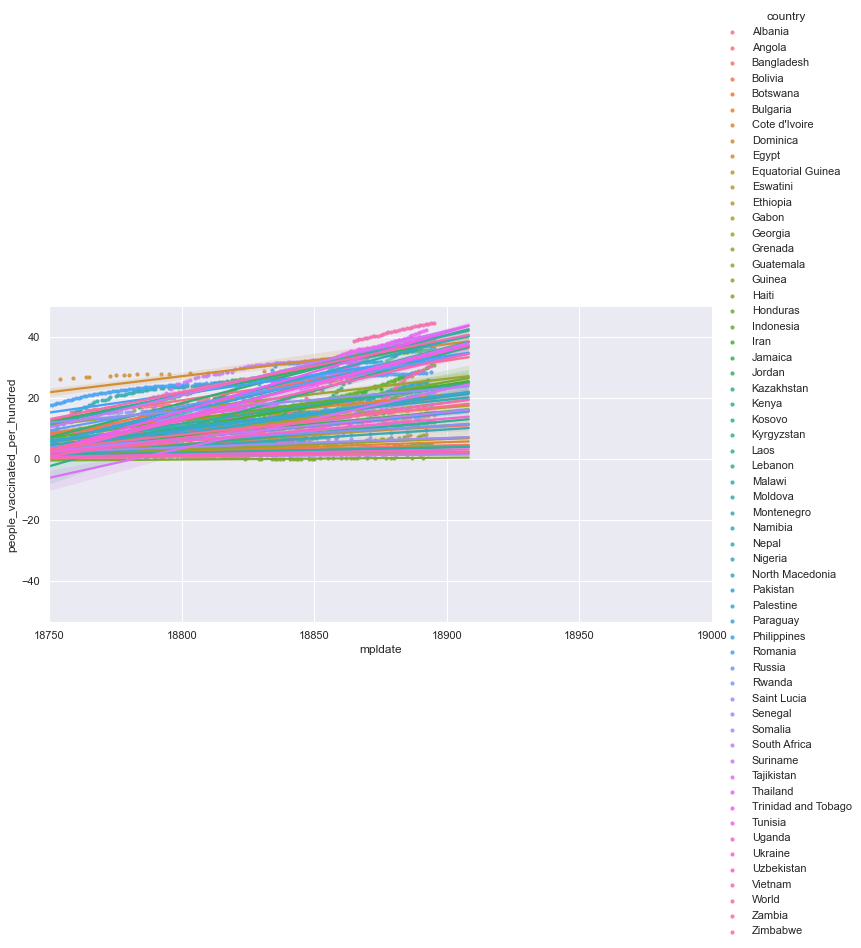

In [12]:
reg = sns.lmplot(data=full_df[['people_vaccinated_per_hundred','country','mpldate']],truncate=False,aspect=2,scatter_kws={"s": 10},x='mpldate',y='people_vaccinated_per_hundred',hue='country')
reg.set(xlim=(18750,19000))